In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from joblib import dump, load

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
df.isna().sum()

,0
x,0
y,1


In [6]:
df[df['y'].isnull()]

,x,y
213,3530.157369,NaN


In [7]:
df.dropna(subset=['y'],inplace =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<Axes: xlabel='x', ylabel='y'>

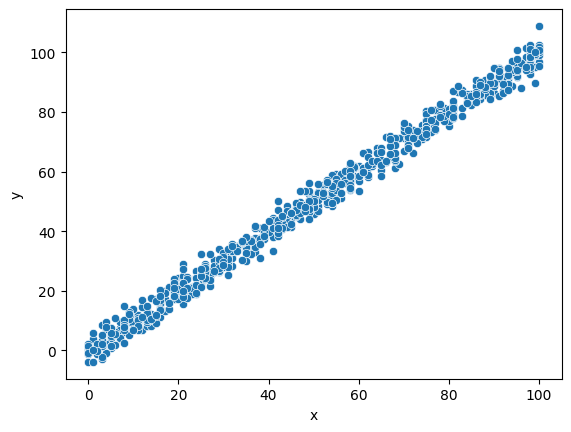

In [9]:
sns.scatterplot(x = 'x',y = 'y',data = df)

In [10]:
X = df[['x']]
Y = df['y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
X_train

,x
436,87.0
542,49.0
382,27.0
612,95.0
648,88.0
...,...
75,41.0
600,65.0
576,67.0
338,62.0


In [13]:
y_predict = model.predict(X_test)

In [14]:
y_predict

array([80.82800817, 45.81677556, 52.81902208, 86.82993376, 71.82511979,
       43.8161337 , 74.82608258, 11.80586389, 16.80746855, 24.810036  ,
       88.83057562, 28.81131973, 82.82865003, 90.83121749, 68.82415699,
       71.82511979, 69.82447792, 60.82158954, 88.83057562,  9.80522202,
       98.83378494,  2.8029755 , 94.83250121, 50.81838022,  0.80233364,
       31.81228252, 83.82897097, 67.82383606, 94.83250121, 36.81388718,
        6.80425923, 53.81934302,  4.80361737, 74.82608258, 57.82062674,
       33.81292438, 74.82608258, 41.81549184, 45.81677556, 57.82062674,
       72.82544072, 34.81324532, 87.83025469,  3.80329643, 96.83314308,
        1.80265457, 99.83410587, 20.80875227, 18.80811041, 96.83314308,
       33.81292438, 29.81164066, 41.81549184, 17.80778948, 25.81035693,
       38.81452904, 86.82993376,  2.8029755 , 88.83057562, 21.8090732 ,
       94.83250121, 53.81934302, 10.80554296, 57.82062674, 83.82897097,
       85.82961283, 79.82768724, 42.81581277, 53.81934302,  1.80

In [15]:
residual = y_test - y_predict

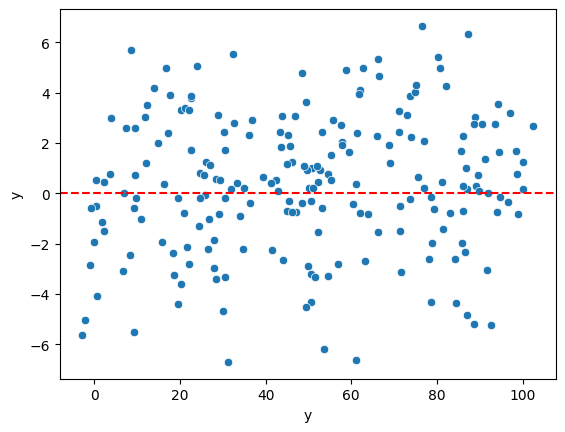

In [16]:
sns.scatterplot(x = y_test,y = residual)
plt.axhline(y = 0,color = 'r',linestyle = '--')

In [17]:
mae = mean_absolute_error(y_test,y_predict)
msr = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(msr)
r2 = r2_score(y_test,y_predict)

In [18]:
print('MAE:',mae)
print('MSE:',msr)
print('RMSE:',rmse)
print('R2:',r2)


MAE: 2.1974319009838177
MSE: 7.566404743444077
RMSE: 2.750709861734617
R2: 0.9909250031080238


In [19]:
final_model = LinearRegression()
final_model.fit(X,Y)

LinearRegression()

In [29]:
dump(final_model,'premier_model.joblib')

['premier_model.joblib']

In [30]:
loaded_model = load('premier_model.joblib')

In [31]:
df_2 = pd.read_csv('test.csv')


In [32]:
df_2.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [33]:
X_2 = df_2[['x']]
y_2 = df_2['y']

In [34]:
y_2_predict = loaded_model.predict(X_2)

In [35]:
y_2_predict

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [36]:
residual_2 = y_2 - y_2_predict

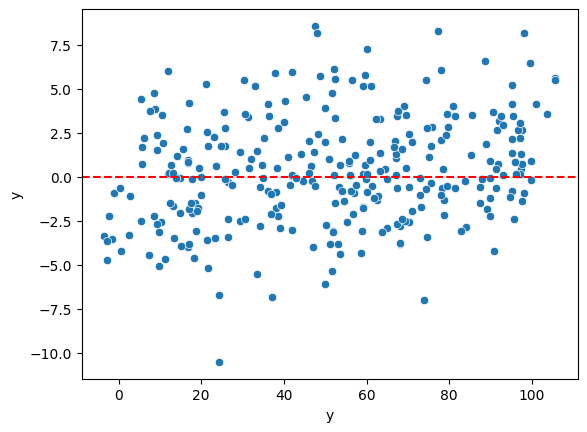

In [37]:
sns.scatterplot(x = y_2,y = residual_2)
plt.axhline(y = 0,color = 'r',linestyle = '--')

<Axes: xlabel='y', ylabel='Density'>

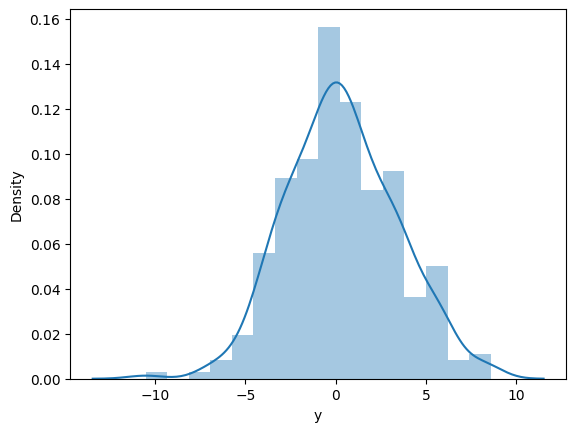

In [38]:
sns.distplot(residual_2)